In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import Normalizer, normalize
from sklearn.svm import SVC
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
image = imread(r"tiger_data\train\tiger\Image_1.jpg")

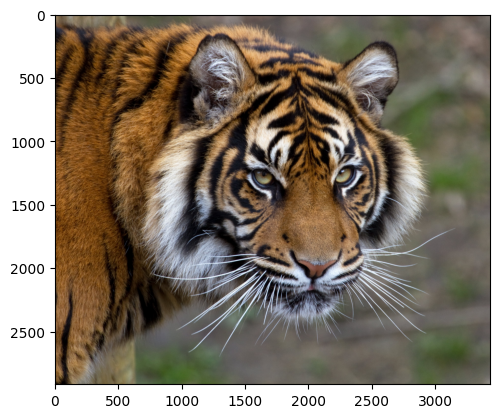

In [3]:
plt.imshow(image)

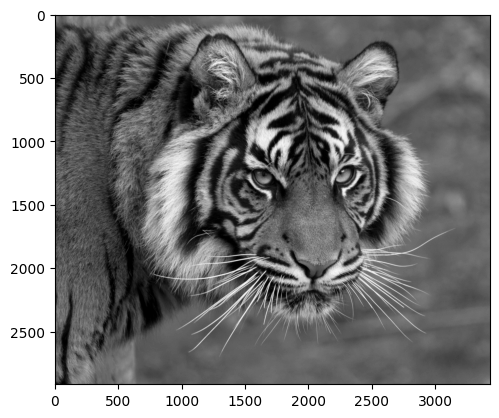

In [5]:
from skimage.color import rgb2gray
gray_img = rgb2gray(image)

plt.imshow(gray_img, cmap='gray')

In [6]:
gray_img.shape

(2916, 3432)

In [7]:
from skimage.transform import resize

resized_img = resize(image, (28,28))

In [8]:
flat_img = resized_img.flatten()
flat_img.shape

(2352,)

In [21]:
input_dir = r"C:\Users\DELL\Desktop\my new project\tiger_data\train"
catg = ["not_tiger", "tiger"]

data = []
labels = []

for cat_indx, cat in enumerate(catg):
    for file in os.listdir(os.path.join(input_dir, cat)):
        img_path = os.path.join(input_dir, cat, file)
        print(img_path)
        img = imread(img_path) 
        img = resize(img, (15, 15))
        data.append(img.flatten())
        labels.append(cat_indx)

C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (1).jpeg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (1).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (10).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (11).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (12).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (13).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (14).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (15).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (16).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (17).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (18).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\not_tiger\image (19).jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train

OSError: Could not find a backend to open `C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\LICENSE`` with iomode `r`.

In [22]:
gray_scale = []
for image in data:
    image = rgb2gray(image.reshape(15,15,3))
    gray_scale.append(image.flatten())

ValueError: cannot reshape array of size 675 into shape (256,256,3)

In [23]:
data_list = data
labels_list = labels

In [ ]:
import numpy as np
for i, d in enumerate(data):
    print(f"Element {i} shape: {np.shape(d)}")

In [27]:
import numpy as np
y = np.asarray(labels)
X = np.asarray(data)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3135, 675), (349, 675), (3135,), (349,))

In [30]:
svc = SVC()

In [31]:
svc.fit(X_train, y_train)

SVC()

In [32]:
svc.score(X_train, y_train)

0.9910685805422648

In [33]:
y_pred = svc.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ",accuracy)

accuracy:  0.9799426934097422


In [35]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[  2   7]
 [  0 340]]


In [36]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.98      1.00      0.99       340

    accuracy                           0.98       349
   macro avg       0.99      0.61      0.68       349
weighted avg       0.98      0.98      0.97       349



In [ ]:
import joblib
model = "another_one.pkl"


In [4]:
path = r"C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger"
images = []
for image in os.listdir(path):
    image = os.path.join(path, image)
    print(image)
    img = imread(image)
    img = resize(img, (15, 15))
    img = images.append(img.flatten())
print(len(images))

C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000001.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000002.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000003.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000007.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000009.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000012.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000014.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000015.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000016.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000018.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000019.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000020.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000021.jpg
C:\Users\DELL\Desktop\my new project\tiger_data\train\tiger\000023.jpg
C:\Use

In [11]:
X = np.array(images)

In [13]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM()

In [14]:
svm.fit(X)

OneClassSVM()

In [15]:
import joblib
model_2 = "one_class_classifier.pkl"
joblib.dump(svm, model_2)

['one_class_classifier.pkl']

In [ ]:
for i, j in enumerate(images):
    print(i , j.shape)

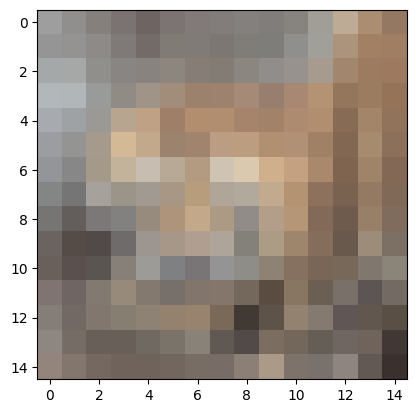

In [8]:
plt.imshow(images[45].reshape(15,15,3))

In [74]:
gray_scale = []
for image in images:
    image = rgb2gray(image.reshape(256,256,3))
    gray_scale.append(image.flatten())